# CRISP DM

In [ ]:
Bussines Understanding

- Problem
Pada saat ini, banyak sekali iklan-iklan palsu di internet dengan penawaran-penawaran yang menggiurkan.
Kasus ini tentang kumpulan data iklan palsu yang menunjukkan apakah pengguna internet akan mengklik
iklan atau tidak.

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad)
bertujuan untuk menganalisis dan memprediksi apakah pengguna internet akan mengklik iklan atau tidak.
Jika masih banyak pengguna masih tertipu dengan iklan palsu, maka akan banyak oknum-oknum yang akan membuat
iklan palsu dengan tujuan tertentu dan harus mengedukasi agar tidak ada lagi pengguna internet yang mengklik
iklan palsu.

In [ ]:
Data Understanding

Dari pengumpulan data yang telah diambil mengenai iklan, terdapat 10 kolom yang berisi 3 kolom float64,
3 kolom int64, dan 4 kolom objek. Jika menggunakan Logistic Regression, maka hanya kolom yang berisi float64 
atau int64 saja yang bisa diolah. Berikut atribut-atribut nya :

0. Daily_Time_Spent_on_Site : waktu yang dihabiskan oleh pengguna dalam website (dalam menit) (float64)
1. Age : umur pengguna (int64)
2. Area Income : pendapatan rata-rata domisili pengguna (float64)
3. Daily_Internet_Usage : rata-rata menit yang dihabiskan pengguna dalam sehari (float64)
4. Ad Topic Line : judul iklan (objek)
5. City : nama kota pengguna (objek)
6. Male : apakah pengguna laki-laki atau tidak (int64)
7. Country : negara pengguna (objek)
8. Timestamp : waktu saat pengguna mengklik atau menutup iklan (objek)
9. Clicked_on_Ad : apakah pengguna mengklik iklan atau tidak (objek)

In [ ]:
Data Preparation

Untuk fitur, data yang digunakan yaitu: 
1. Daily_Time_Spent_on_Site
2. Age  
3. Area_Income
4. Daily_Internet_Usage
5. Male  

Sedangkan, yang menjadi target yaitu Clicked_on_Ad

In [ ]:
Modeling

Model yang digunakan yaitu Logistic Regerssion.

In [ ]:
Evaluation

Evaluasi dilakukan terhadap model yang diterapkan pada tahap sebelumnya dengan tujuan agar model yang ditentukan
dapat sesuai dengan tujuan yang ingin dicapai dalam tahap pertama.

In [ ]:
Deployment

Deployment dilakukan dengan menggunakaan Github untuk menyimpan source code dan streamlit Share
untuk mengaplikasikan source code yang telah diunggah di Github

# Import library

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.head(10)

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked_on_Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area_Income               1000 non-null   float64
 3   Daily_Internet_Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked_on_Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# pisahkan data atribut dengan label

In [5]:
X = df.drop(columns=['Clicked_on_Ad', 'Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)
Y = df['Clicked_on_Ad']

In [6]:
print(X)

     Daily_Time_Spent_on_Site  Age  Area_Income  Daily_Internet_Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58     1
996                     51.30   45     67782.17                134.42     1
997                     51.63   51     42415.72                120.37     1
998                     55.55   19     41920.79                187.95     0
999                     45.01   26     29875.80                178.35     0

[1000 rows x 5 columns]


In [7]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked_on_Ad, Length: 1000, dtype: int64


# Visualisasi Data

<AxesSubplot:xlabel='Area_Income', ylabel='Count'>

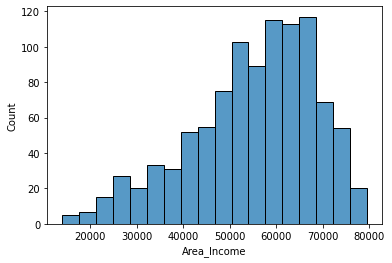

In [8]:
import seaborn as sns

sns.histplot(x='Area_Income',data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

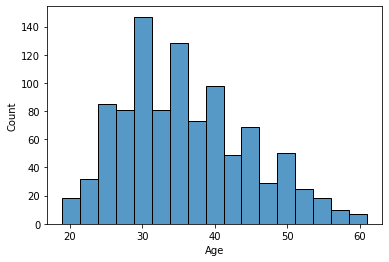

In [9]:
sns.histplot(x='Age',data=df)

<AxesSubplot:xlabel='Daily_Internet_Usage', ylabel='Count'>

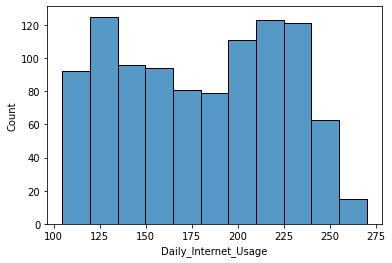

In [10]:
sns.histplot(x='Daily_Internet_Usage',data=df)

# Split data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [12]:
print(X.shape, x_train.shape, x_test.shape)

(1000, 5) (800, 5) (200, 5)


# Membuat model training

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

# Evaluasi model

In [15]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [16]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.90375


In [17]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [18]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.89


# Model Prediksi

In [20]:
input_data = (68.95, 35, 61833.9, 256.09, 0)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi = model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('Pengguna tidak menekan iklan')
else:
    print('Pengguna menekan iklan')

[0]
Pengguna tidak menekan iklan


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


# Save Model

In [21]:
import pickle

filename = 'iklan.sav'
pickle.dump(model, open(filename, 'wb'))